In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from array import *
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.interpolate import griddata
from IPython.display     import Image

In [2]:
#Load in Data
L11 = np.array(pd.read_csv("-4ML1_1.tsv",sep="\t"))[:,1]
L12 = np.array(pd.read_csv("-4ML1_2.tsv",sep="\t"))[:,1]
L21 = np.array(pd.read_csv("-4ML2_1.tsv",sep="\t"))[:,1] 
L22 = np.array(pd.read_csv("-4ML2_2.tsv",sep="\t"))[:,1]
L31 = np.array(pd.read_csv("-4ML3_1.tsv",sep="\t"))[:,1] 
L32 = np.array(pd.read_csv("-4ML3_2.tsv",sep="\t"))[:,1] 
wn = np.array(pd.read_csv("-4ML1_1.tsv",sep="\t"))[:,0] #Wavenumber set

0.0252017434686422


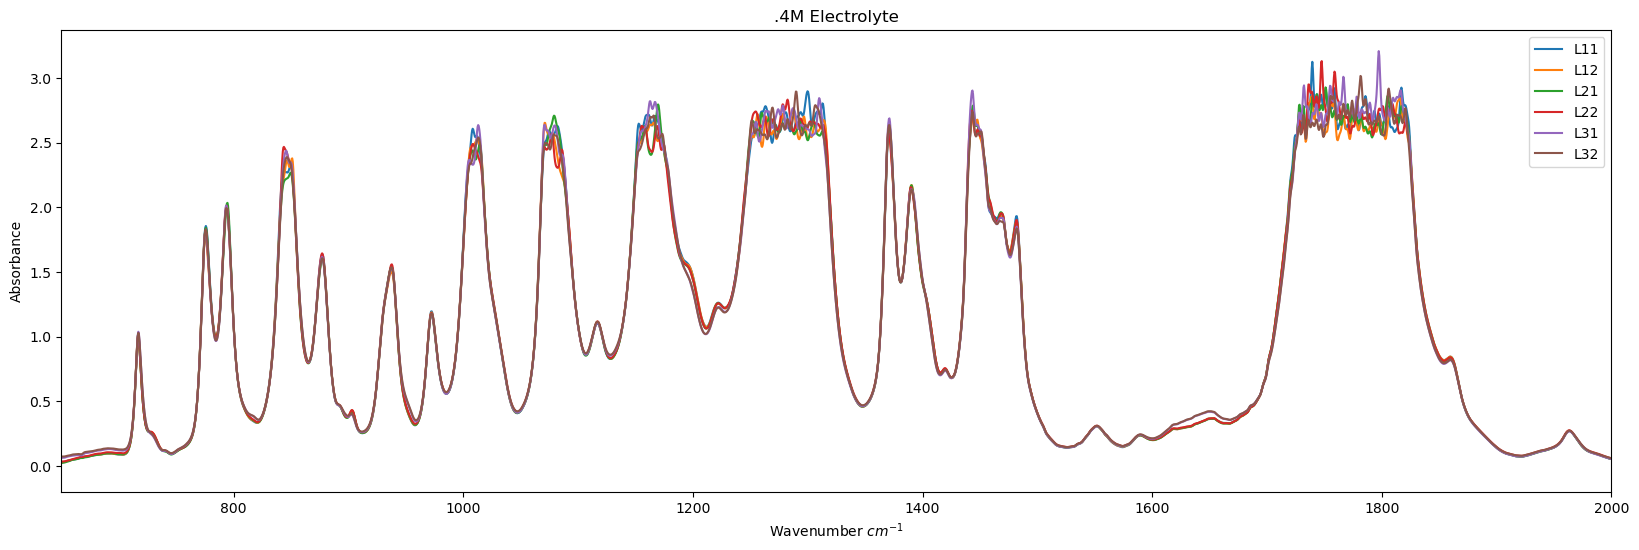

In [3]:
plt.figure(figsize=(20,6))
plt.plot(wn,L11,label="L11")
plt.plot(wn,L12,label="L12")
plt.plot(wn,L21,label="L21")
plt.plot(wn,L22,label="L22")
plt.plot(wn,L31,label="L31")
plt.plot(wn,L32,label="L32")
plt.legend()
plt.title(".4M Electrolyte")
plt.xlim(650,2000)
#plt.ylim(0,1.2)
plt.ylabel("Absorbance")
plt.xlabel("Wavenumber $cm^{-1}$")
print(L11[1])

(0.0, 2.5)

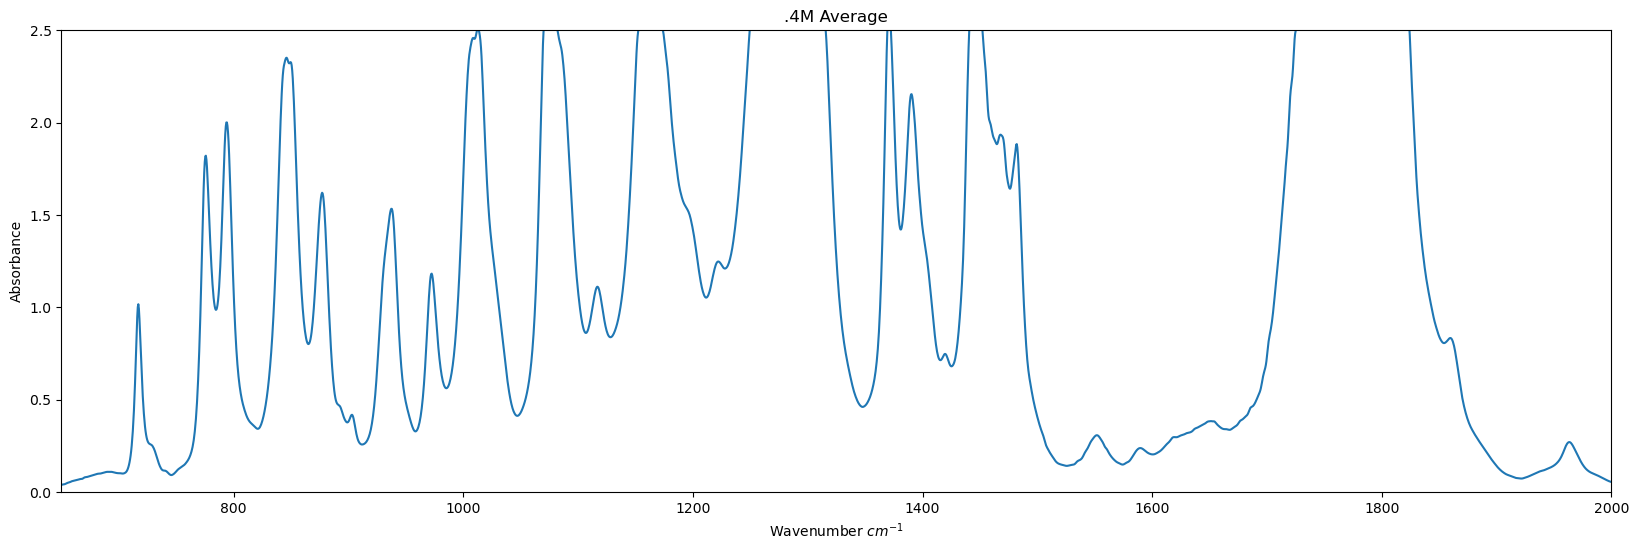

In [16]:
avg4 = np.zeros(len(L11))

#ar = np.array([np.zeros(len(L11)),np.zeros(len(L11)),np.zeros(len(L11)),np.zeros(len(L11)),np.zeros(len(L11)),np.zeros(len(L11))])
#print(np.shape(ar))
#help(np.average)
for i in range(len(L11)):
    #ar[i] = np.array([L11[i],L12[i],L21[i],L22[i],L31[i],L32[i]])
    avg4[i] = np.average(np.array([L11[i],L12[i],L21[i],L22[i],L31[i],L32[i]]));

plt.figure(figsize=(20,6))
plt.plot(wn,avg4)
plt.title(".4M Average")
plt.ylabel("Absorbance")
plt.xlabel("Wavenumber $cm^{-1}$")
#plt.xlim(700,800)
plt.xlim(650,2000)
plt.ylim(0,2.5)

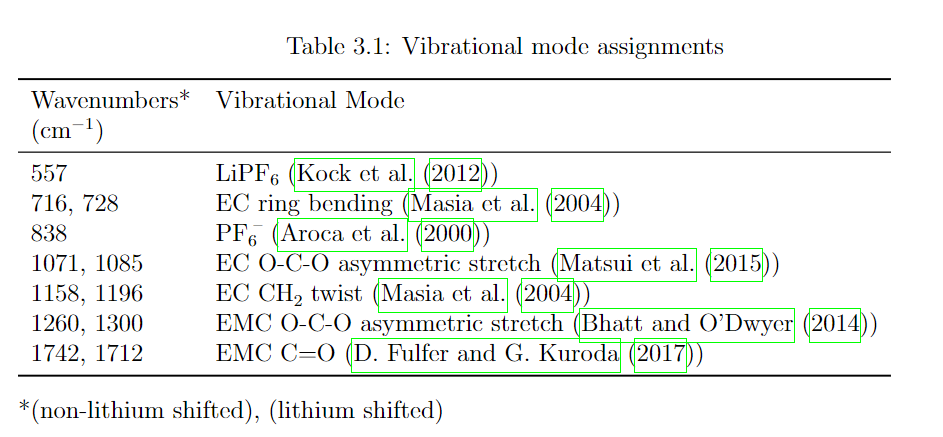

In [5]:
Image(filename="peak_assignments.png",width=600)

Usable peaks: \
716, 728 cm$^{-1}$  EC ring bending\
838 PF$_6^{-1}$ although this will likely saturate at higher concentrations\
1085 EC O-C-O asymmetric stretch\
1196 EC CH$_2$ twist\
Non-assigned possibilities:\
794, 937, 972\
\
All of the analysis methods used by Lydia are not possible due to our cell thickness. We must create our own fitting methods for Li concentration.

Method 1: 716cm$^{-1}$/728cm$^{-1}$ peak ratio\
EC ring bending

In [6]:
x1 = np.where(wn == 716.527557922003)[0]
x2 = np.where(wn == 728.097567995395)[0]
concar = np.array([.4,.7,1,1.3,1.6])

Cor1_4M = avg4[x1]/avg4[x2]
#Cor1_7M = avg7[x1]/avg7[x2]
#Cor1_1M = avg1[x1]/avg1[x2]
#Cor1_13M = avg13[x1]/avg13[x2]
#Cor1_16M = avg16[x1]/avg16[x2]
#Cor1ar = np.array([Cor1_4M,Cor1_7M,Cor1_1M,Cor1_13M,Cor1_16M])
#corfit1 = np.polyfit(concar,Cor1ar,1)
#xx = np.linspace(0,1.8,1000)
#yy1 = np.polyval(corfit1,xx)
#plt.plot(concar,Cor1ar,'o')
#plt.plot(xx,yy1)
#plt.xlabel("Concentration (M)")
#plt.ylabel("Peak Ratio")
#plt.title("Diagnostic Curve 1: 716/728cm$^{-1}$")

[3.89539716]


Method 2: Peak height at 1085cm$^{-1}$ \
This one is a little questionable. Wait to see the other data before going for this one.

Method 3: Peak height at 1196\
EC CH$_2$ twist

In [9]:
x4 = np.where(wn == 1196.20089221471)[0]
#Cor3ar = np.array([avg4[x4],avg7[x4],avg1[x4],avg13[x4],avg16[x4]])
#corfit3 = np.polyfit(concar,Cor3ar,1)
#yy3 = np.polyval(corfit3,xx)
#plt.plot(concar,Cor3ar,'o')
#plt.plot(xx,yy3)
#plt.xlabel("Concentration (M)")
#plt.ylabel("Peak Height")
#plt.title("Diagnostic Curve 3: 1196cm$^{-1}$")

Method 4: Peak minimum height at 794

In [17]:
x4 = np.where(wn == 794.14304216434)[0]
#Cor4ar = np.array([avg4[x4],avg7[x4],avg1[x4],avg13[x4],avg16[x4]])
#corfit4 = np.polyfit(concar,Cor4ar,1)
#yy4 = np.polyval(corfit4,xx)
#plt.plot(concar,Cor4ar,'o')
#plt.plot(xx,yy4)
#plt.xlabel("Concentration (M)")
#plt.ylabel("Peak Height")
#plt.title("Diagnostic Curve 4: 785cm$^{-1}$")

Method 5: Peak height at 937

In [11]:
x5 = np.where(wn == 937.321916822564)[0]
#Cor5ar = np.array([avg4[x5],avg7[x5],avg1[x5],avg13[x5],avg16[x5]])
#corfit5 = np.polyfit(concar,Cor5ar,1)
#yy5 = np.polyval(corfit5,xx)
#plt.plot(concar,Cor5ar,'o')
#plt.plot(xx,yy5)
#plt.xlabel("Concentration (M)")
#plt.ylabel("Peak Height")
#plt.title("Diagnostic Curve 5: 937cm$^{-1}$")

Method 6: Peak at 972.5

In [12]:
x6 = np.where(wn == 972.514030795798)[0]
#Cor6ar = np.array([avg4[x6],avg7[x6],avg1[x6],avg13[x6],avg16[x6]])
#corfit6 = np.polyfit(concar,Cor6ar,1)
#yy6 = np.polyval(corfit6,xx)
#plt.plot(concar,Cor6ar,'o')
#plt.plot(xx,yy6)
#plt.xlabel("Concentration (M)")
#plt.ylabel("Peak Height")
#plt.title("Diagnostic Curve 6: 972.5cm$^{-1}$")

Fringe Test:

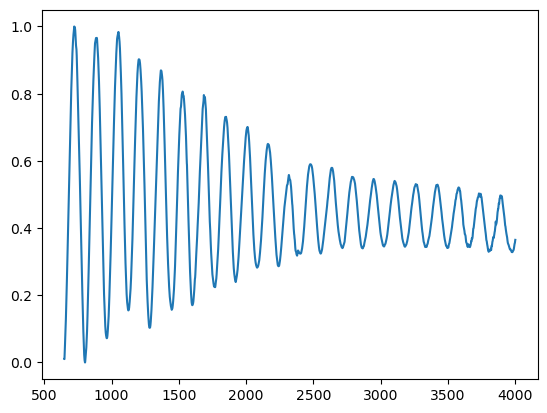

In [18]:
Fringe = np.array(pd.read_csv("Finished_Cell_Fringe_Test.tsv",sep="\t"))
plt.plot(Fringe[:,0],Fringe[:,1])

In [28]:
Thick = 10*15/(2*(3422.06438155867-1051.01441160458))*1000
print("Cell Thickness =",round(Thick,1),"μm")

Cell Thickness = 31.6 μm


Text(0.5, 0, 'Wavenumber $cm^{-1}$')

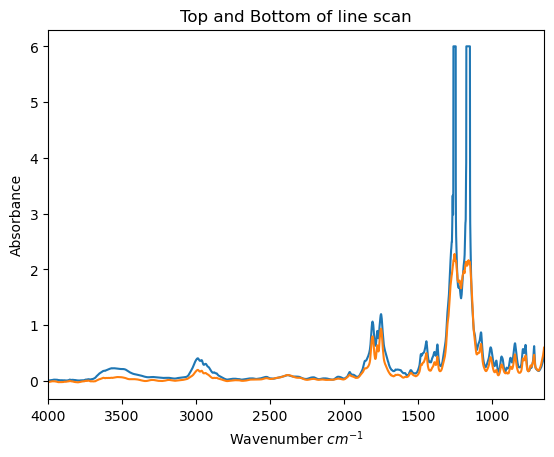

In [27]:
#plt.figure(figsize=(20,6))
Bottom = np.array(pd.read_csv("-4M Bottom.tsv",sep="\t"))
plt.plot(Bottom[:,0],Bottom[:,1])
Top = np.array(pd.read_csv("-4M Top.tsv",sep="\t"))
plt.plot(Top[:,0],Top[:,1])
plt.xlim(4000,650)
plt.title("Top and Bottom of line scan")
plt.ylabel("Absorbance")
plt.xlabel("Wavenumber $cm^{-1}$")